In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import json
from datetime import datetime,time,timedelta
import matplotlib.pyplot as plt
plt.style.use("ggplot")

We 
 - read in the data
 - clean the data
 - display the head of the data frame

In [27]:
df = pd.read_csv("ethusd.csv")
df.dropna(axis=1,inplace = True)
df["date_time"] = df['time'].apply(lambda x: datetime.fromtimestamp(x))
df["day"] = df["date_time"].apply(lambda x: x.weekday())
df.set_index('date_time',inplace=True)
df["range"] = df["high"] - df["low"]
df.head()

,time,open,high,low,close,Volume,day,range
date_time,,,,,,,,
2016-05-23 10:00:00,1463961600,13.91,13.91,13.61,13.61,0.78673,0,0.30
2016-05-24 10:00:00,1464048000,13.68,13.74,12.00,12.77,2753.23998,1,1.74
2016-05-25 10:00:00,1464134400,13.00,13.18,11.93,12.61,9697.18313,2,1.25
2016-05-26 10:00:00,1464220800,12.61,12.95,12.15,12.47,2989.89229,3,0.80
2016-05-27 10:00:00,1464307200,12.47,12.47,10.25,10.98,19334.80484,4,2.22


In [4]:
(df.describe())['range']

count    1565.000000
mean       21.331188
std        34.627367
min         0.100000
25%         4.440000
50%        11.080000
75%        24.380000
max       433.570000
Name: range, dtype: float64

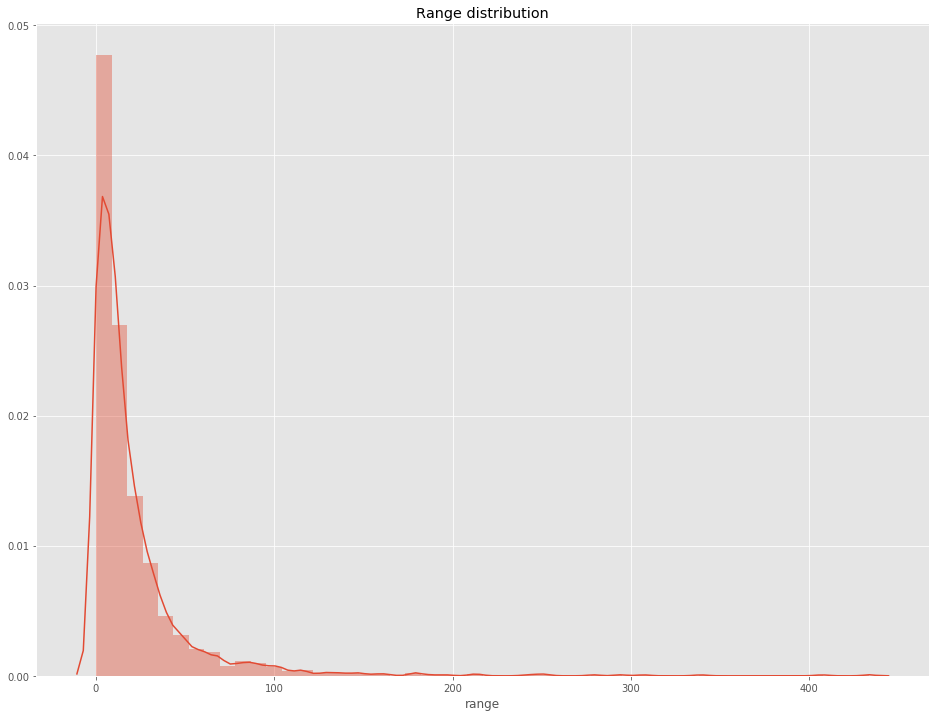

In [14]:
plt.figure(figsize=(16,12))
sns.distplot(df['range'])
plt.title("Range distribution")
plt.savefig("../../../report/fig/range.png",dpi=250)

count    1.565000e+03
mean     1.333461e+05
std      1.276997e+05
min      7.867300e-01
25%      5.343518e+04
50%      9.512464e+04
75%      1.669171e+05
max      1.322283e+06
Name: Volume, dtype: float64

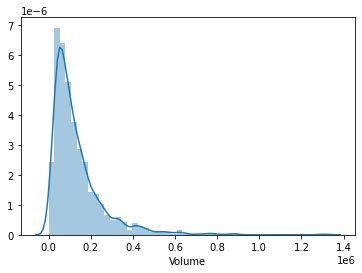

In [24]:
sns.distplot(df['Volume'])
(df.describe())['Volume']

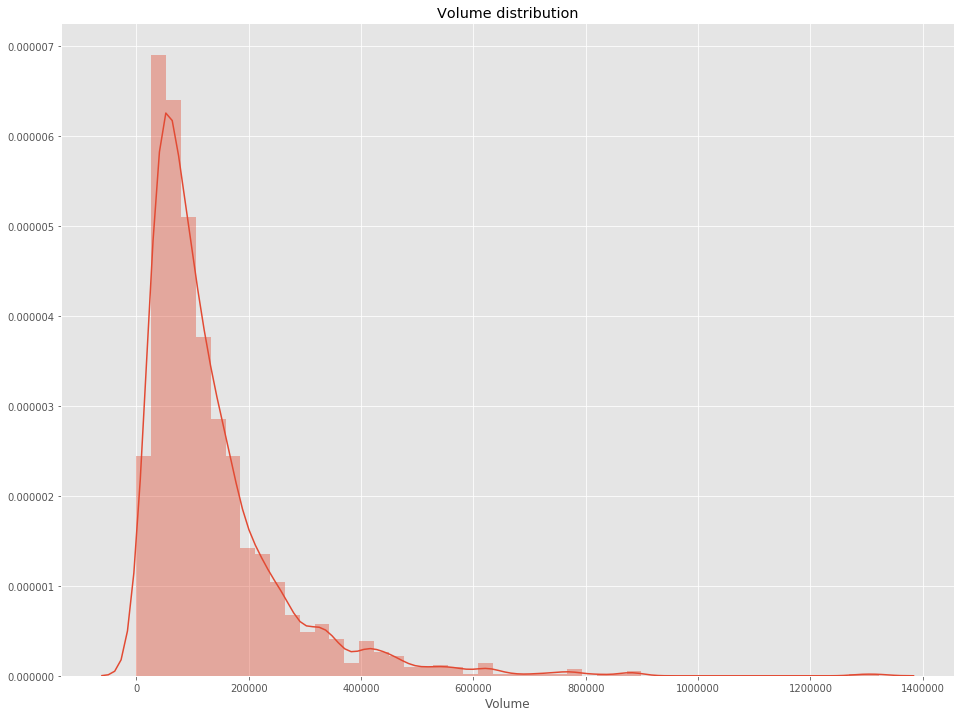

In [16]:
plt.figure(figsize=(16,12))
sns.distplot(df['Volume'])
plt.title("Volume distribution")
plt.savefig("../../../report/fig/vol_dist.png",dpi=250)

The average daily range is 21.331188


The average daily Volume is 1.333461e+05

We will define volume below the 25th percentile to have low volume. Thus a day with volume below 5.343518e+04 is low.

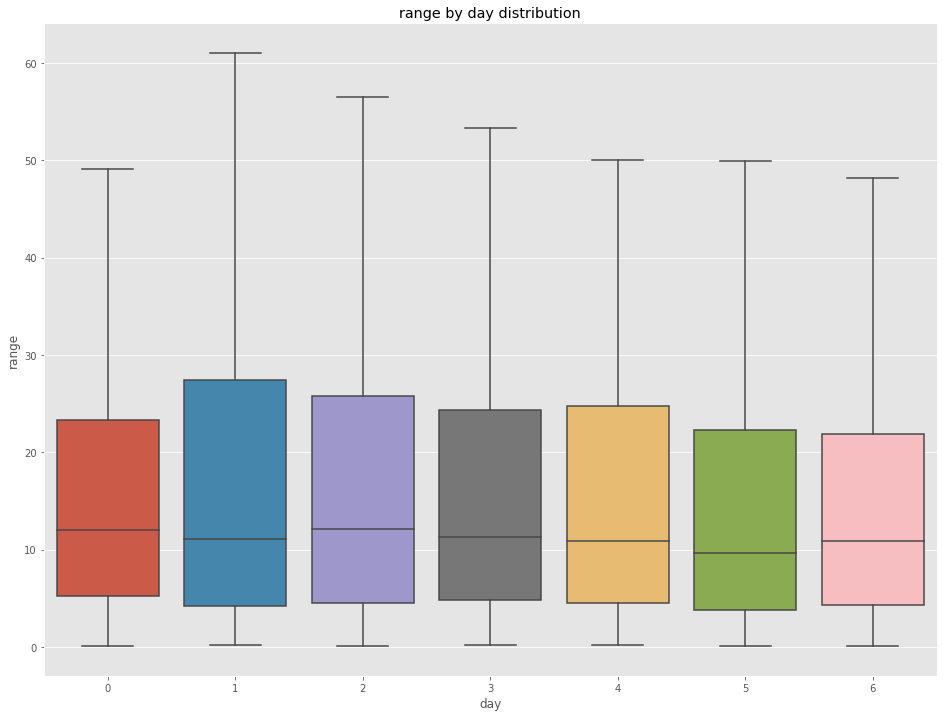

In [33]:

plt.figure(figsize=(16,12))
sns.boxplot(x='day',y="range",data = df,showfliers=False)

plt.title("range by day distribution")
plt.savefig("../../../report/fig/rday.png",dpi=250)

In [38]:
df_day = df.groupby("day")
print(df_day.mean())

           time        open        high         low       close  \
day                                                               
0    1531396800  244.666652  254.059286  233.163839  244.640179   
1    1531483200  244.642768  254.736205  231.990179  245.165446   
2    1531569600  245.172812  255.199821  230.065089  243.928795   
3    1531656000  243.915134  253.779531  231.644643  242.454085   
4    1531440000  241.549215  251.391749  229.833072  243.245695   
5    1531526400  243.247578  253.825830  236.150538  246.119417   
6    1531612800  246.120852  254.312287  235.164081  245.684126   

            Volume      range  
day                            
0    139691.779979  20.895446  
1    145372.288791  22.746027  
2    150107.028572  25.134732  
3    151790.895260  22.134888  
4    141879.322847  21.558677  
5    100524.152772  17.675291  
6    103816.814631  19.148206  


In [39]:
(19.148206 + 17.675291)/2

18.4117485

In [42]:
now = datetime.now()
now.time()

datetime.time(1, 6, 15, 30557)

In [47]:
time(0, 6, 15, 30557)< time(1, 7, 15, 30557)

True

In [48]:
now.isoformat()

'2020-09-04T01:06:15.030557'

In [51]:
(now - timedelta(hours = 1)).isoformat()

'2020-09-04T00:06:15.030557'

In [52]:
now

datetime.datetime(2020, 9, 4, 1, 6, 15, 30557)

In [53]:
datetime(2020, 9, 4, 1, 6, 15, 30557).isoformat()

'2020-09-04T01:06:15.030557'

In [54]:
(datetime(2020, 9, 4, 1, 6, 15, 30557) -timedelta(hours = 1)) .isoformat()

'2020-09-04T00:06:15.030557'

In [64]:
start = datetime(2017, 8, 4, 1, 6, 15)
end = datetime(2020, 8, 4, 1, 6, 15)

dt = end
starts = []
ends = []
while dt > start:
    starts.append((dt - timedelta(minutes = 30)).isoformat())
    ends.append(dt.isoformat())
    dt -= timedelta(minutes = 30)
print(starts[0],ends[0])  

2020-08-04T00:36:15 2020-08-04T01:06:15


In [59]:
dt > start

False

In [60]:
dt

datetime.datetime(2017, 8, 4, 1, 6, 15)

In [1]:
# https://api.pro.coinbase.com/products/ETH-USD/candles?start=2020-08-04T00:06:15&end=2020-08-04T01:06:15&granularity=60

In [8]:
a = [[1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496],
 [1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496]] 


a += [[1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496],[1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496]]
a

[[1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496],
 [1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496],
 [1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496],
 [1596485280, 394.22, 394.84, 394.24, 394.84, 36.8941496]]